### MNIST Dataset
70,000 small images of handwritten by high school students of the US Census Bureau. Each image is labeled with the digit it represents. This set has been stud‐
ied so much that it is often called the “Hello World” of Machine Learning

In [1]:
import pandas as pd

mnist_train = pd.read_csv('mnist_train.csv')
mnist_test = pd.read_csv('mnist_test.csv')

In [2]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

### Preparing the data

In [2]:
X_train = mnist_train.drop('label', axis=1)
X_test = mnist_test.drop('label', axis=1)

In [3]:
y_train = mnist_train['label']
y_test = mnist_test['label']

let's shuffle the data to avoid order before runing the ml models

In [6]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier
### Stochastic Gradient Descent (SGD) classifier
This clas‐
sifier has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning)

Let's build a model that can predict only the number 5

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [9]:
print("Classification Score is: " + str(sgd_clf.score(X_test, y_test_5)))

Classification Score is: 0.9492


In [10]:
y_pred_5 = sgd_clf.predict(X_test)

In [11]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test_5, y_pred_5))

Accuracy: 0.9492


### Cross-validation
evaluate your SGDClassifier model
using K-fold cross-validation, with three folds. Remember that K-fold cross-
validation means splitting the training set into K-folds (in this case, three)

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets. it can be 99% even if we predict few data from a big dataset.

### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_5, y_pred_5)

array([[8707,  401],
       [ 107,  785]])

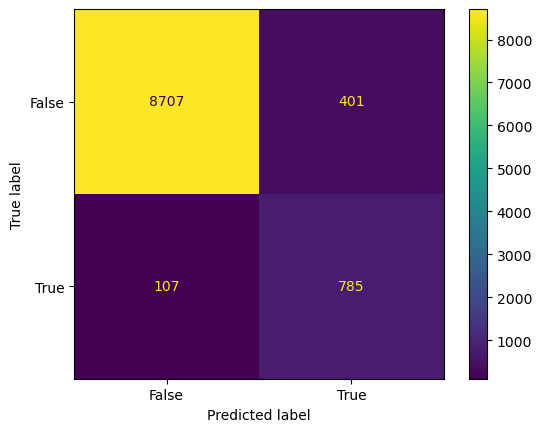

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

predictions = sgd_clf.predict(X_test)

cm = confusion_matrix(y_test_5, predictions, labels=sgd_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_clf.classes_)
disp.plot()
plt.show()

**The 1st row** of this matrix considers non-5 images (the negative class), 8707 were correctly classified as non-5s (true negatives), the remaining 401 were wrongly classified as 5s (false positives).

**The 2nd row** considers the images of 5s (the positive class): 107 were wrongly classified as non-5s (false negatives), while the remaining785 were correctly classified as 5s (true positives).

### Precision and Recall and F1_score
An interesting one to look at is the accuracy of the positive pre‐
dictions; this is called the precision of the classifier

* **precision =TP /TP + FP**

TP is the number of true positives, and FP is the number of false positives.

recision is typically used
along with another metric named recall, also called sensitivity or true positive rate
(TPR): this is the ratio of positive instances that are correctly detected by the classifier
* **recall = TP / TP + FN**

FN is of course the number of false negatives.

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test_5, y_pred_5) # == 4344 / (4344 + 1307)

0.6618887015177066

In [19]:
recall_score(y_test_5, y_pred_5) # == 4344 / (4344 + 1077)

0.8800448430493274

In [10]:
from sklearn.metrics import f1_score

f1_score(y_test_5, y_pred_5)

### RandomForest classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = forest_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9705


In [26]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

Scaling the data

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [29]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[ 971,    0,    0,    0,    0,    2,    3,    1,    3,    0],
       [   0, 1127,    2,    2,    0,    1,    2,    0,    1,    0],
       [   6,    0, 1002,    5,    3,    0,    3,    8,    5,    0],
       [   1,    0,    9,  972,    0,    9,    0,    9,    8,    2],
       [   1,    0,    0,    0,  955,    0,    5,    1,    4,   16],
       [   5,    1,    1,    9,    2,  860,    5,    2,    5,    2],
       [   7,    3,    0,    0,    3,    3,  937,    0,    5,    0],
       [   1,    4,   20,    2,    0,    0,    0,  990,    2,    9],
       [   4,    0,    6,    7,    5,    5,    5,    4,  930,    8],
       [   7,    6,    2,   12,   12,    1,    0,    4,    4,  961]])

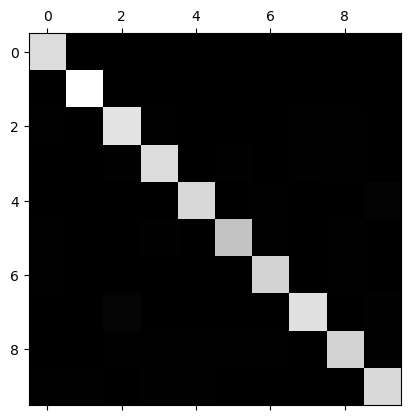

In [30]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly. The 5s look slightly darker than the
other digits, which could mean that there are fewer images of 5s in the dataset or that
the classifier does not perform as well on 5s as on other digits.

let'slook at the errors by dividing the confusion matrix values by the sum of each row

In [31]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

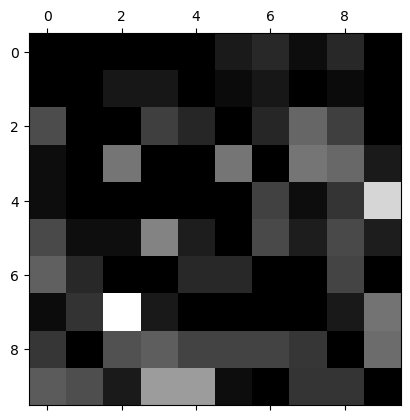

In [33]:
# wefill the diagonal with zeros to keep only the errors, and let’s plot the result:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

**rows represent actual classes**, while **columns represent predicted classes**

Looking at this plot, it seems that your efforts should be spent on improving
classification of 7. For example, you could try to gather more training data for these digits. Or you
could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make
some patterns stand out more, such as closed loops.

### Multilabel Classification system
For example,
consider a face-recognition classifier: what should it do if it recognizes several people
on the same picture? Of course it should attach one label per person it recognizes.

### KNeighborsClassifier KNN
This code creates a y_multilabel array containing two target labels for each digit
image: the first indicates whether or not the digit is large (7, 8, or 9) and the second
indicates whether or not it is odd. The next lines create a KNeighborsClassifier
instance (which supports multilabel classification, but not all classifiers do)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict(X_test)

For example, one approach is to measure the F 1 score
for each individual label (or any other binary classifier metric discussed earlier), then
simply compute the average score.

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test_5, y_pred_5)